In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[8,3]

In [24]:
train=pd.read_csv('customer_churn_dataset-training-master.csv')
train.shape

(440833, 12)

In [25]:
test=pd.read_csv('customer_churn_dataset-testing-master.csv')
test.shape

(64374, 12)

In [26]:
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [27]:
test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [28]:
from sklearn.pipeline import Pipeline

In [29]:
def drop_cols(df,col):
    df=df.drop(col,axis=1)
    return df

In [30]:
train=drop_cols(train,"CustomerID")
train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [31]:
test=drop_cols(test,"CustomerID")
test.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [32]:
df=pd.concat([train,test],axis=0)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [33]:
df=df.dropna()
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [34]:
df.shape

(505206, 11)

In [35]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()
    
    
def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

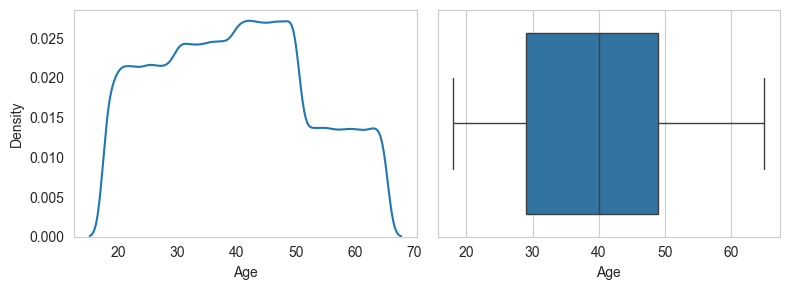

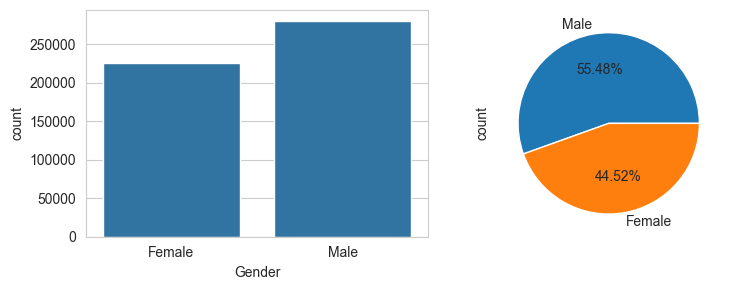

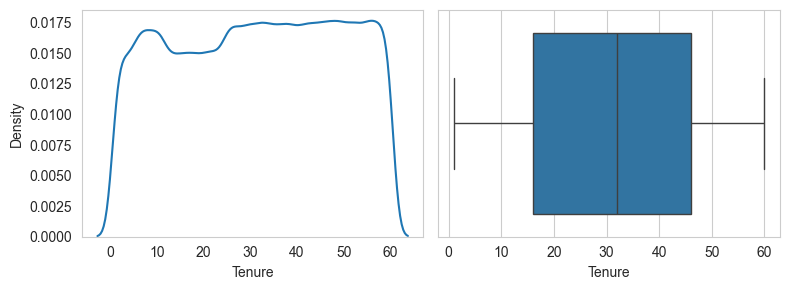

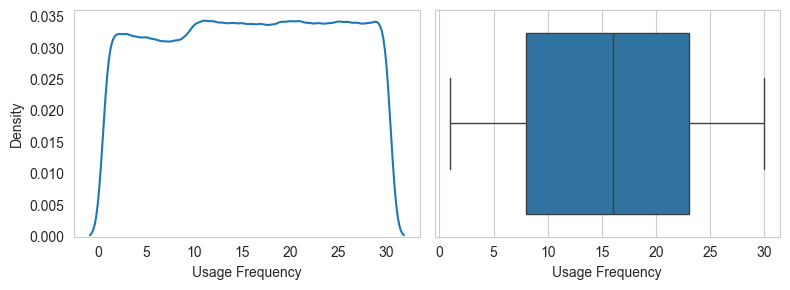

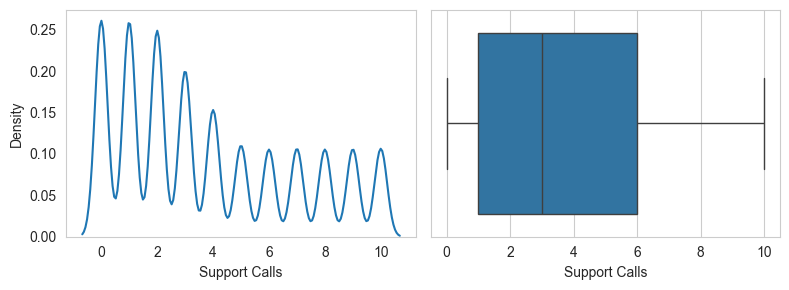

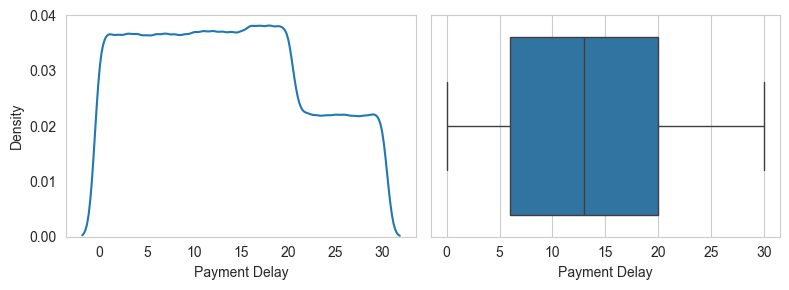

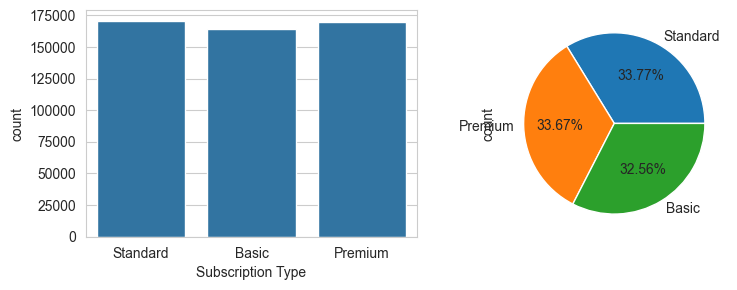

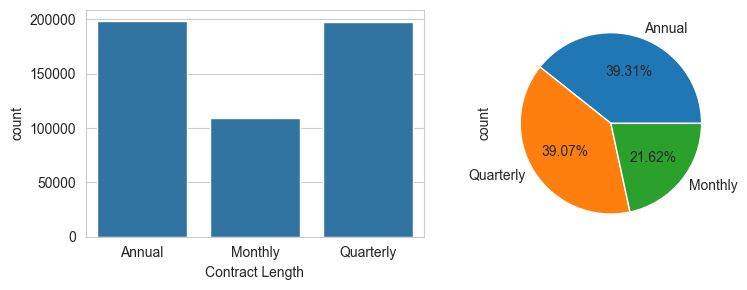

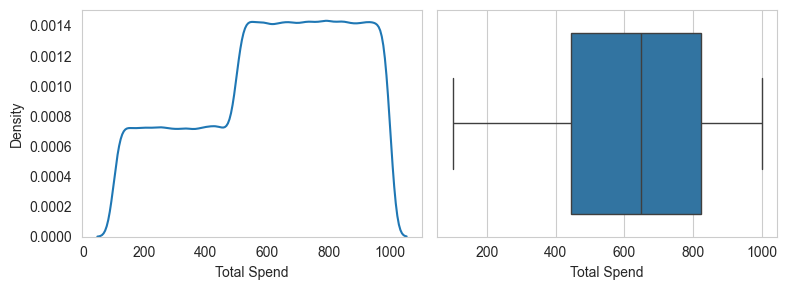

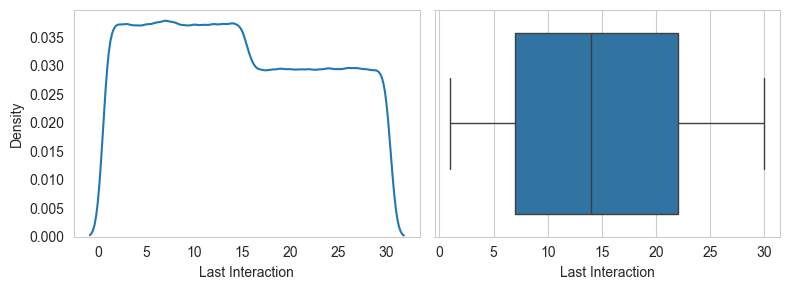

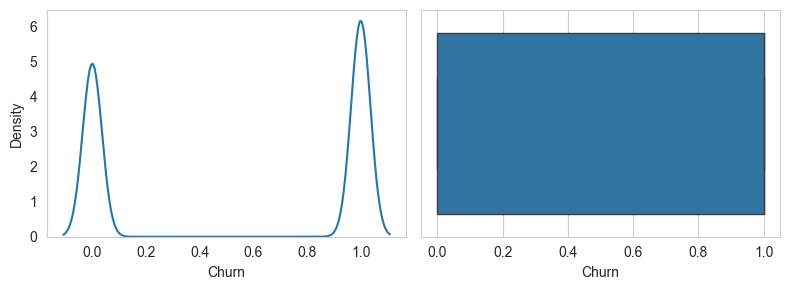

In [36]:
for i in df.columns:
    if df[i].dtype=='object':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

In [37]:
df.select_dtypes(include='object')

,Gender,Subscription Type,Contract Length
0,Female,Standard,Annual
1,Female,Basic,Monthly
2,Female,Basic,Quarterly
3,Male,Standard,Monthly
4,Male,Basic,Monthly
...,...,...,...
64369,Female,Basic,Quarterly
64370,Male,Standard,Annual
64371,Male,Premium,Monthly
64372,Female,Standard,Monthly


In [38]:
y=df['Churn']
x=df.drop('Churn',axis=1)

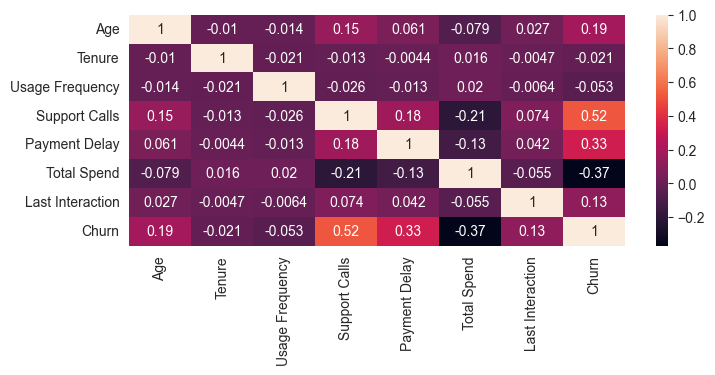

In [39]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)
plt.show()

In [40]:
for i in x.select_dtypes(include='object').columns:
    #print(f"For {i}:")
    print(x[i].value_counts())
    print("\n")

Gender
Male      280273
Female    224933
Name: count, dtype: int64


Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64


Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64




In [41]:
for i in x.select_dtypes(include='object').columns:
    x[i]=x[i].map(x[i].value_counts(normalize=True))

In [42]:
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0.44523,39.0,14.0,5.0,18.0,0.337743,0.393123,932.0,17.0
1,65.0,0.44523,49.0,1.0,10.0,8.0,0.325564,0.216217,557.0,6.0
2,55.0,0.44523,14.0,4.0,6.0,18.0,0.325564,0.390660,185.0,3.0
3,58.0,0.55477,38.0,21.0,7.0,7.0,0.337743,0.216217,396.0,29.0
4,23.0,0.55477,32.0,20.0,5.0,8.0,0.325564,0.216217,617.0,20.0


<Axes: >

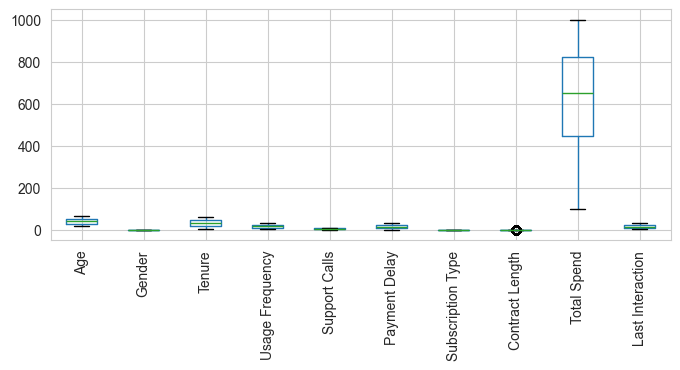

In [43]:
x.boxplot(rot=90)

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
mmax=MinMaxScaler()

In [46]:
x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']]=mmax.fit_transform(x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']])
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,0.255319,0.44523,0.644068,0.448276,0.5,0.600000,0.337743,0.393123,0.924444,0.551724
1,1.000000,0.44523,0.813559,0.000000,1.0,0.266667,0.325564,0.216217,0.507778,0.172414
2,0.787234,0.44523,0.220339,0.103448,0.6,0.600000,0.325564,0.390660,0.094444,0.068966
3,0.851064,0.55477,0.627119,0.689655,0.7,0.233333,0.337743,0.216217,0.328889,0.965517
4,0.106383,0.55477,0.525424,0.655172,0.5,0.266667,0.325564,0.216217,0.574444,0.655172


In [47]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

<Axes: >

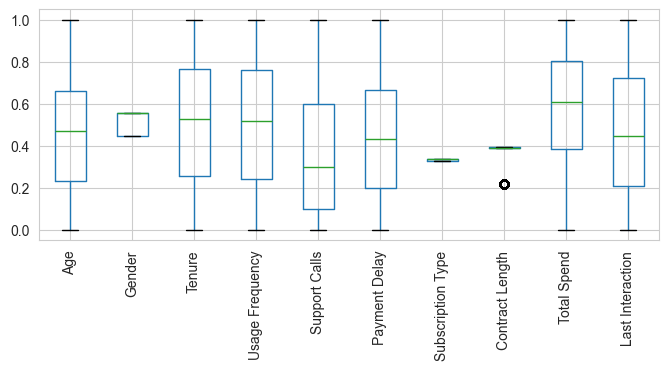

In [48]:
x.boxplot(rot=90)

In [49]:
y.value_counts()

Churn
1.0    280492
0.0    224714
Name: count, dtype: int64

In [50]:
y.shape[0]

505206

In [51]:
x.shape[0]

505206

In [54]:
import statsmodels.api as sm

In [55]:
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.389162
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               505206
Model:                          Logit   Df Residuals:                   505195
Method:                           MLE   Df Model:                           10
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.4336
Time:                        12:21:00   Log-Likelihood:            -1.9661e+05
converged:                       True   LL-Null:                   -3.4710e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.4221      0.249     33.805      0.000       7.934       8.910
Age     

In [56]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [57]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [59]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [60]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])   
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

For the LogisticRegression()
The TRAIN accuracy is 0.8490317946861816
The ROC score for TRAIN data is 0.8489421666015698


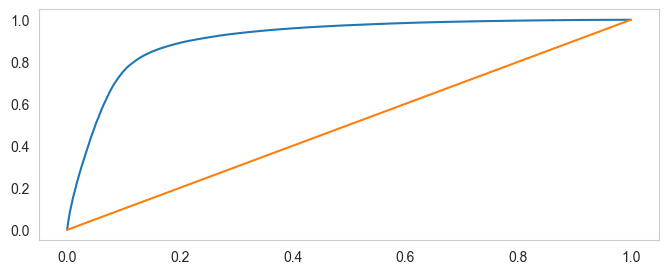

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8466964014726647
The ROC score for TEST data is 0.8465361914088461


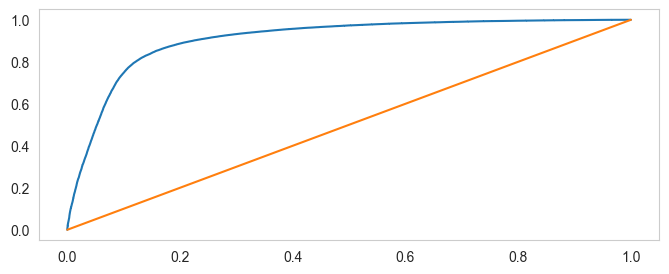

In [61]:
predictor(lr)

For the DecisionTreeClassifier()
The TRAIN accuracy is 1.0
The ROC score for TRAIN data is 1.0


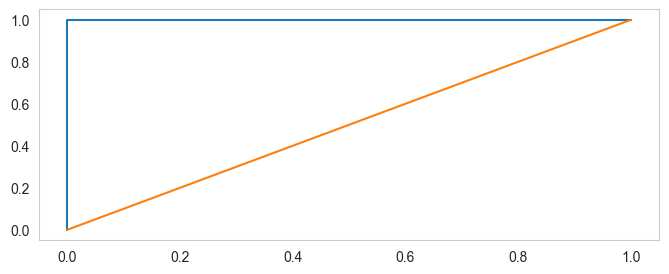

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8823583747905148
The ROC score for TEST data is 0.8820151857365092


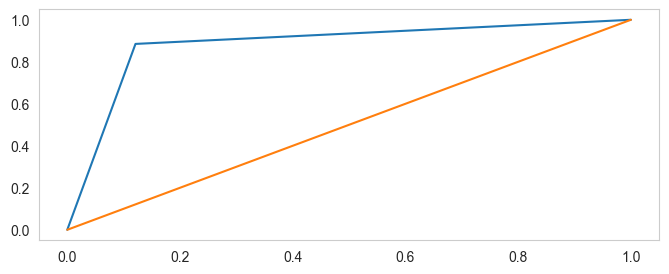

In [62]:
predictor(dt)

For the GaussianNB()
The TRAIN accuracy is 0.8604981280609879
The ROC score for TRAIN data is 0.8635529417094348


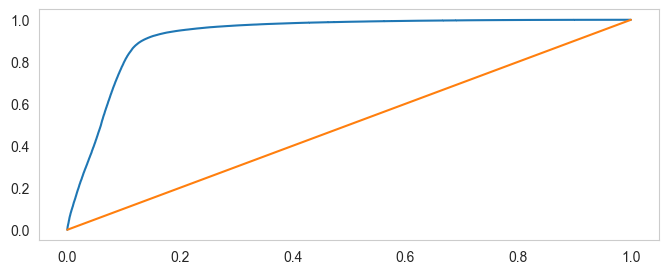

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8577479843232473
The ROC score for TEST data is 0.8608016641266573


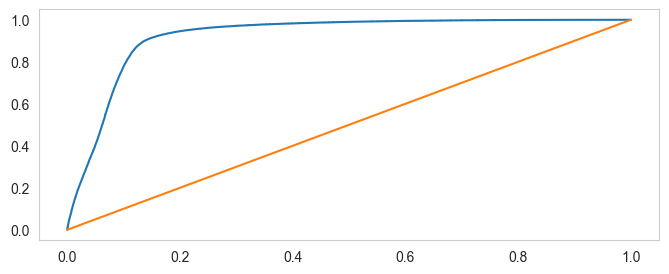

In [63]:
predictor(gnb)

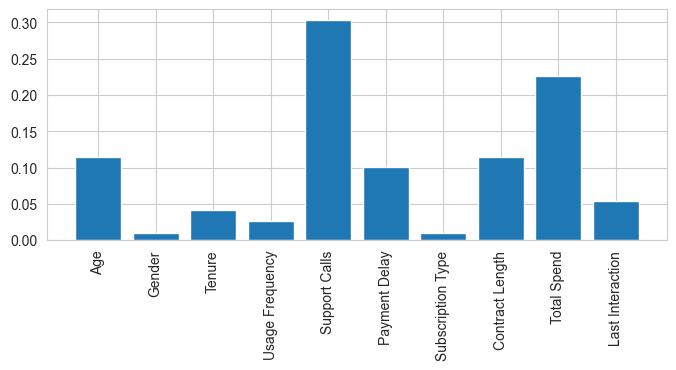

In [64]:
plt.bar(xtrain.columns,dt.fit(xtrain,ytrain).feature_importances_)
plt.xticks(rotation=90)
plt.show()